# SolarInsight: Previsão do Retorno Financeiro em Energia Solar

O crescente interesse por fontes de energia renovável, especialmente a energia solar fotovoltaica, tem impulsionado muitos consumidores residenciais a considerar a instalação de sistemas solares em suas residências. No entanto, um dos principais desafios enfrentados por esses consumidores é a incerteza quanto ao retorno financeiro desse investimento. Muitos potenciais usuários não possuem informações claras sobre quanto tempo levará para que o sistema se pague, considerando variáveis como o consumo energético, o custo da instalação, a tarifa local de energia elétrica e as condições climáticas da região.

Essa falta de clareza gera uma barreira significativa para a adoção mais ampla da energia solar residencial, limitando o potencial de expansão dessa fonte limpa e sustentável. Portanto, existe a necessidade de ferramentas que auxiliem consumidores e empresas a estimar de forma precisa e personalizada o tempo de retorno do investimento em sistemas fotovoltaicos, facilitando a tomada de decisão e promovendo a democratização do acesso à energia solar.

O objetivo deste projeto é desenvolver um modelo preditivo capaz de estimar o tempo de retorno financeiro (payback) de sistemas de energia solar residencial, utilizando dados reais e simulados referentes a características técnicas do sistema, perfil de consumo energético, tarifa de energia e condições regionais de irradiação solar.

Este modelo, baseado em técnicas de machine learning, especificamente o algoritmo XGBoost, pretende fornecer uma ferramenta precisa e prática para que consumidores, instaladoras e demais interessados possam avaliar a viabilidade econômica da instalação de sistemas solares, contribuindo para decisões mais informadas e para o aumento da adoção de energia renovável no Brasil.

## Descrições das Variáveis

estado:	Unidade federativa do Brasil onde está localizada a residência instalação do sistema solar.

cidade:	Cidade específica onde o sistema está instalado, permitindo análise regional detalhada.

tarifa_energia:	Valor médio da tarifa de energia elétrica cobrada na localidade, em reais por kWh (R$/kWh).

irradiação_mensal:	Média mensal de irradiação solar na região, medida em kWh por metro quadrado por dia (kWh/m²/dia). Indica o potencial de geração de energia solar da localidade.

tamanho_sistema_kWp:	Potência nominal do sistema fotovoltaico instalado, medida em kilowatt-pico (kWp). Reflete a capacidade máxima de geração do sistema.

consumo_mensal_kWh:	Consumo médio mensal de energia elétrica da residência em quilowatt-hora (kWh).

custo_total_R$:	Custo estimado total para aquisição e instalação do sistema fotovoltaico, em reais (R$).

geracao_estimativa_kWh:	Estimativa da geração mensal de energia pelo sistema, em kWh, calculada com base na potência, irradiação e perdas técnicas.
economia_mensal_R$	Valor aproximado da economia mensal na conta de energia, em reais, gerada pela energia solar.

tipo_telhado:	Característica do telhado onde o sistema está instalado (plano ou inclinado), que pode influenciar a instalação e eficiência do sistema.

classe_consumo:	Categoria de consumo de energia (residencial ou rural), que pode influenciar tarifas e incentivos.

possui_incentivo:	Indica se o sistema ou a instalação conta com incentivos financeiros ou fiscais (sim/não).

ano_instalacao:	Ano em que o sistema foi instalado, podendo influenciar custos, tecnologias disponíveis e incentivos vigentes.

payback_meses:	Variável target do modelo: tempo estimado, em meses, para que o investimento no sistema seja recuperado através da economia gerada na conta de energia.



---

## Pré-processamento dos dados

Nesta etapa começaremos estudando os dados, analisando dados nulos e faltantes e analisando outliers, preprarando os dados para a nossa análise mais aprofundada adiante

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('dataset_energia_solar_3000_linhas.csv', delimiter=',')

In [ ]:
df

,estado,cidade,tarifa_energia,irradiação_mensal,tamanho_sistema_kWp,consumo_mensal_kWh,custo_total_R$,geracao_estimativa_kWh,economia_mensal_R$,tipo_telhado,classe_consumo,possui_incentivo,ano_instalacao,payback_meses
0,SP,São Paulo,0.85,4.5,3.9,670.6,18609.08,421.2,358.02,inclinado,rural,sim,2023,52.0
1,BA,Vitória da Conquista,0.88,5.2,8.1,832.7,39873.78,1010.9,732.78,inclinado,rural,sim,2021,54.4
2,DF,Ceilândia,0.92,5.0,8.6,600.4,40990.69,1032.0,552.37,plano,rural,sim,2021,74.2
3,SC,Chapecó,0.83,4.4,8.2,850.5,40057.79,865.9,705.91,plano,residencial,sim,2020,56.7
4,DF,Brasília,0.92,5.0,9.3,618.1,46225.10,1116.0,568.65,inclinado,rural,não,2022,81.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,CE,Caucaia,0.89,5.5,9.8,563.1,45429.57,1293.6,501.16,plano,rural,não,2022,90.6
2996,GO,Anápolis,0.86,5.1,5.8,895.4,26880.38,709.9,610.53,inclinado,residencial,não,2023,44.0
2997,GO,Rio Verde,0.86,5.1,3.7,329.5,17516.11,452.9,283.37,inclinado,rural,não,2021,61.8
2998,RS,Santa Maria,0.95,4.3,6.7,298.5,31404.43,691.4,283.57,inclinado,rural,sim,2020,110.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   estado                  3000 non-null   object 
 1   cidade                  3000 non-null   object 
 2   tarifa_energia          3000 non-null   float64
 3   irradiação_mensal       3000 non-null   float64
 4   tamanho_sistema_kWp     3000 non-null   float64
 5   consumo_mensal_kWh      3000 non-null   float64
 6   custo_total_R$          3000 non-null   float64
 7   geracao_estimativa_kWh  3000 non-null   float64
 8   economia_mensal_R$      3000 non-null   float64
 9   tipo_telhado            3000 non-null   object 
 10  classe_consumo          3000 non-null   object 
 11  possui_incentivo        3000 non-null   object 
 12  ano_instalacao          3000 non-null   int64  
 13  payback_meses           3000 non-null   float64
dtypes: float64(8), int64(1), object(5)
memor

Aqui analisamos que os dados estão em seus tipos corretos, iremos mais adiante mudar os dados categóricos para dados númericos que nosso modelo irá conseguir analisar

In [ ]:
df.isnull().sum()

,0
estado,0
cidade,0
tarifa_energia,0
irradiação_mensal,0
tamanho_sistema_kWp,0
consumo_mensal_kWh,0
custo_total_R$,0
geracao_estimativa_kWh,0
economia_mensal_R$,0
tipo_telhado,0


Não temos dados nulos no nosso dataset

In [ ]:
df.describe()

,tarifa_energia,irradiação_mensal,tamanho_sistema_kWp,consumo_mensal_kWh,custo_total_R$,geracao_estimativa_kWh,economia_mensal_R$,ano_instalacao,payback_meses
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.904363,4.907500,6.049733,624.348700,27881.109370,712.829167,472.165037,2021.059000,63.074067
std,0.072068,0.381867,2.323862,215.263082,10800.171168,280.608172,181.961894,1.421804,28.950273
min,0.830000,4.300000,2.000000,250.100000,8488.820000,206.400000,175.300000,2019.000000,33.200000
25%,0.860000,4.500000,4.000000,439.100000,18332.630000,475.200000,320.160000,2020.000000,43.975000
50%,0.890000,5.000000,6.100000,622.850000,28086.730000,712.800000,440.475000,2021.000000,51.950000
75%,0.920000,5.200000,8.100000,811.300000,36990.700000,944.600000,604.030000,2022.000000,72.325000
max,1.100000,5.500000,10.000000,1000.000000,49941.560000,1320.000000,1086.690000,2023.000000,222.800000


Aqui já conseguimos começar a analisar um pouco mais nossos dados, não temos grandes indicativos de outliers, analisando as médias elas estão próximas as medianas, talvez nas variáveis "economia_mensal" e "payback_meses", vamos analisar mais profundamente esses dados

In [ ]:
df.nunique()

,0
estado,10
cidade,55
tarifa_energia,10
irradiação_mensal,9
tamanho_sistema_kWp,81
consumo_mensal_kWh,2464
custo_total_R$,2999
geracao_estimativa_kWh,617
economia_mensal_R$,2180
tipo_telhado,2


In [ ]:
# Listas vazias para os resultados
continuous = []
categorical = []

# Loop pelas colunas
for c in df.columns[:-1]:
    if df.dtypes[c] == float:
        continuous.append(c)
    else:
        categorical.append(c)

In [ ]:
continuous

['tarifa_energia',
 'irradiação_mensal',
 'tamanho_sistema_kWp',
 'consumo_mensal_kWh',
 'custo_total_R$',
 'geracao_estimativa_kWh',
 'economia_mensal_R$']

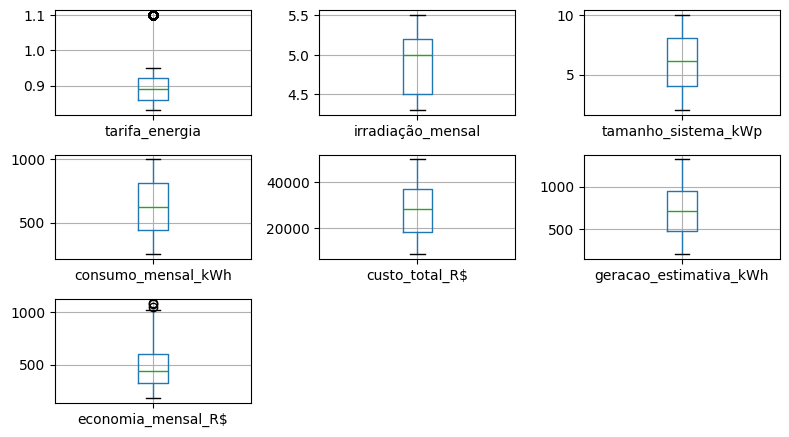

In [ ]:
# Tamanho da área de plotagem
fig = plt.figure(figsize = (8,10))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(7, 3, i + 1);
    df.boxplot(col);
    plt.tight_layout()

A variável "economia_mensal" como vimos antes tem alguns outliers mas eles estão próximos do máximo então deixaremos, na variável "tarifa_energia" é um valor baixo e ele é muito importante para a predição do modelo, deixaremos também, nas demais variáveis tudo ok

In [ ]:
df['possui_incentivo'].unique()

array(['sim', 'não'], dtype=object)

In [ ]:
df['classe_consumo'].unique()

array(['rural', 'residencial'], dtype=object)

In [ ]:
df['tipo_telhado'].unique()

array(['inclinado', 'plano'], dtype=object)

Agora que já temos nossas variáveis corretamente tratadas e preparadas vamos começar a fase da análise



---



## Analise Exploratória

<Axes: title={'center': 'Classe de Consumo'}, ylabel='count'>

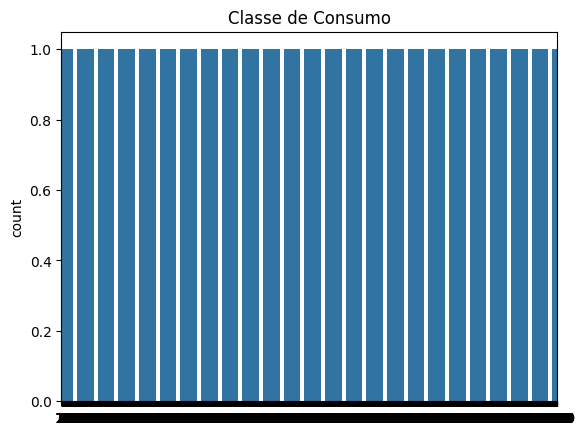

In [ ]:
plt.title("Classe de Consumo")
sns.countplot(df['classe_consumo'])